<img src="./pictures/logo_sizinglab.png" style="float:right; max-width: 60px; display: inline" alt="SizingLab" /></a>


# Scaling laws of electrical components

*Written by Marc Budinger (INSA Toulouse) and Scott Delbecq (ISAE-SUPAERO), Toulouse, France.*

The estimation models calculate the component characteristics requested for their selection without requiring a detailed design. Scaling laws are particularly suitable for this purpose. This notebook illustrates the approach with electrical drone components characteristics.
Validation of the obtained scaling laws is achieved thanks to catalog data.  

The [following article](https://hal.archives-ouvertes.fr/hal-00712986/file/IMECHE_v1.2_full.pdf) gives more details for components of electromechanical actuators:  
>*Budinger, M., Liscouët, J., Hospital, F., & Maré, J. C. (2012). Estimation models for the preliminary design of electromechanical actuators. Proceedings of the Institution of Mechanical Engineers, Part G: Journal of Aerospace Engineering, 226(3), 243-259.*  

**Notation**: The x* scaling ratio of a given parameter is calculated as $x^*=\frac{x}{x_{ref}}$ where $x_{ref}$ is the parameter taken as the reference and $x$ the parameter under study.

### Lipo battery

A lithium-ion polymer battery (abbreviated as LiPo) is a assembly of elementary cells. The more the cells are provided, the bigger is the power and stored energy. The following figure gives an example of a Lipo battery with the following characteristics:
* **Voltage / Cell Count ("S")**: A LiPo cell has a nominal voltage of 3.7V (3V min, 4.2V max) . For the 7.4V battery above, this means that there are two cells in series (which means the voltage gets added together). This is sometimes why you will hear people talk about a "2S" battery pack - it means that there are 2 cells in Series. 
* **Capacity ("C")**: The capacity of a battery is basically a measure of the energy the battery can store. The unit of measure here is milliamp hours (mAh). This is saying how much drain can be put on the battery to discharge it in one hour. The stored energy is given by the the product of voltage and thus here: Capacity (in Amps) *3600*7.4= 0.133 MJ 
* **Discharge Rating ("C" Rating)**: The C Rating is simply a measure of how fast the battery can be discharged safely and without harming the battery. The maximum safe continuous amp draw is here: 50C = 50 x Capacity (in Amps) = 250 A.

![LipoBattery](./pictures/LipoBattery.jpeg)

> **Exercice:** Propose a scaling law which links battery characteristics, as mass or max discharge current, to capacity $C_{bat}$ and voltage $V_{bat}$. Estimate the mass and max discharge current for a 3300 mAh - 4S battery knowing the following reference component:   

Characteristic | Value
--|--
Capacity | 5000mAh
Continuous discharge rate | 50C
Burst rate  | 100C
Voltage | 7.4V
Cells | 2S
Size (LxWxH) | 155x48x16mm
Weight | 273g 


**Answer**:   
$I_{max,bat}^*=C_{bat}^*$  
$M_{bat}^*=V_{bat}^*C_{bat}^*$

#### Scaling laws

The following table summarize the scaling laws which can be used for the ESC.

|                | Scaling laws  | References |References |References |References |References |
| -------------- | -------------------| -----------| -----------|-----------|-----------|-|
|  |                      |  Prolitex TP500-2SPX25J        |TATTU|GENS ACE|KOKAM SLPB98188216P|RAMPAGE TP325-1SR70J
|Voltage| $U_{bat}$|$7.4$ V|$14.8$V|$22.2$V|3.7 V|3.7 V|
|Capacity| $C_{bat}$|$500$ mAh|$10000$mAh|$3300$mAh| 30000 mAh|325 mAh|
|Energy | $E_{bat}=U_{bat}\cdot C_{bat}$|$3700$ J|$148000$ J|$73260$ J|121000 J|1202.5 J|
|Mass|$M_{bat}^*=E_{bat}^*$|$30$ g |$940$g|$506$g| 870 g|12 g
|Max current|$I_{max,bat}^*=C_{bat}^*$|$25$A|$250$A|$198$A||45.5 A|


## Validation with a data plot

We will compare the scaling law with a plot of the catalog data. 

#### Import data

The first step is to import catalog data stored in an excel file. We use for that functions from [Panda](https://pandas.pydata.org/index.html) package (with here an [introduction to panda](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)). 

4 series of LiPo batteries and 1 series of Lithium-Ion bats.:

In [18]:
# Panda package importation
import pandas as pd

# Read the .csv file with bearing data
path='./data/'
df = pd.read_csv(path+'Batteries_Data.csv', sep=';')
# Print the head (first lines of the file)
df.head()

,TYPE,Model,Voltage_V,Capacity_mAh,Discharge_Rate_C,Max_Burst_Discharge_Rate_C,Weight_g,Max_burst_current_A,Volume_mm3,Energy_density_Wh_kg,Imax [A],Pmax_W_kg,Pvol_Wh_m3,Energy_J
0,TATTU,TATTU,11.1,1300,45,90,119,58.50,59616.0,121.260504,117.0,10913.44538,242049.1143,51948.0
1,TATTU,TATTU,11.1,1550,45,90,128,69.75,63648.0,134.414062,139.5,12097.26563,270314.8567,61938.0
2,TATTU,TATTU,11.1,1800,45,90,156,81.00,64032.0,128.076923,162.0,11526.92308,312031.4843,71928.0
3,TATTU,TATTU,11.1,2300,45,90,179,103.50,76230.0,142.625698,207.0,12836.31285,334907.5167,91908.0
4,TATTU,TATTU,11.1,1050,45,90,85,47.25,44676.0,137.117647,94.5,12340.58824,260878.3239,41958.0


#### Reference values for different battery families

In [19]:
Imax_ref_TAT=250 #[A] max burst current ref TATTU
C_ref_TAT=10000 #[mAh] capacity ref TATTU
V_ref_TAT=14.8#[V] voltage ref TATTU
M_ref_TAT=940#[g] mass ref TATTU

Imax_ref_GENS=198 #[A] max burst current ref GENS
C_ref_GENS=3300 #[mAh] capacity ref GENS
V_ref_GENS=22.2#[V] voltage ref GENS
M_ref_GENS=506#[g] mass ref GENS

#SLPB98188216P
C_ref_KOK=30000 #[mAh] capacity ref KOKAM
V_ref_KOK=3.7#[V] voltage ref KOKAM
Volume_ref_KOK=431244 #[mm3] volume ref KOKAM
Eb_ref_KOK=111.36 #[Wh] energy density KOKAM
M_ref_KOK=870#[g] mass ref KOKAM

#TP500-2SPX25J

Imax_ref_PRO=25 #[A] max burst current ref PROLITEX
C_ref_PRO=500 #[mAh] capacity ref PROLITEX
V_ref_PRO=7.4#[V] voltage ref PROLITEX
M_ref_PRO=30#[g] mass ref PROLITEX

#TP325-1SR70J

Imax_ref_RAM=45.5 #[A] max burst current ref RAMPAGE
C_ref_RAM=325 #[mAh] capacity ref RAMPAGE
V_ref_RAM=3.7#[V] voltage ref RAMPAGE
M_ref_RAM=12#[g] mass ref RAMPAGE


C_bats=[C_ref_GENS,C_ref_PRO,C_ref_RAM,C_ref_TAT]
Imax_bats=[Imax_ref_GENS,Imax_ref_PRO,Imax_ref_RAM,Imax_ref_TAT]
V_bats=[V_ref_GENS,V_ref_PRO,V_ref_RAM,V_ref_TAT]
M_bats=[M_ref_GENS,M_ref_PRO,M_ref_RAM,M_ref_TAT]

Battery families are grouped by colors. Values of the estimated mass with respect to the theoretical one is shown in the following figure:

Text(0.5, 0, 'M Data [kg]')

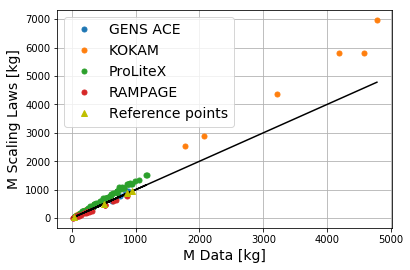

In [22]:
from matplotlib import pyplot as mp
from matplotlib import pyplot as plt

import pandas as pd


# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

groups = df.groupby('TYPE')

C2=df['Capacity_mAh'].values
V2=df['Voltage_V'].values
M2=df['Weight_g'].values


C_bats=[C_ref_GENS,C_ref_KOK,C_ref_PRO,C_ref_TAT]
V_bats=[V_ref_GENS,V_ref_KOK,V_ref_PRO, V_ref_TAT]
M_bats=[M_ref_GENS,M_ref_KOK,M_ref_PRO,M_ref_TAT]


Cvector=[]
Vvector=[]
Pro=[]
Mass_vector=[]
W=[]
Name=[]

for name, group in groups:
    Product=group.Capacity_mAh*group.Voltage_V
    Pro.append(Product)

for A,B,C,D in zip (C_bats, V_bats,Pro,M_bats):
    M=C/A/B*D
    Mass_vector.append(M)


for name, group in groups:
    W.append(group.Weight_g)
    Name.append(name)

i=0
for i in range(len(W)-1):
    plt.plot(W[i], Mass_vector[i], marker='o', linestyle='', ms=5, 
label=Name[i])
    plt.plot(W[i], W[i], '-k',label='_nolegend')

plt.plot(M_bats,M_bats, '^y',label='Reference points')

plt.grid(True,which="both",ls="-")
plt.loglog()
plt.legend(fontsize=14)
#ax1.set_title('M data vs M Scaling Laws ',fontsize=14)
plt.ylabel('M Scaling Laws [kg]',fontsize=14)
plt.xlabel('M Data [kg]',fontsize=14)

# plt.savefig('MdataMSL.pdf', dpi=1200, format='pdf')

Through the X=Y chart we can see if the scatter data differ from the estimation model. Presenting data on a logarithmic scale can be useful when the data covers a wide range of values.

### Filter data with a Pareto frontier

Next we filter the data using a [Pareto frontier](https://fr.wikipedia.org/wiki/Optimum_de_Pareto) to highlight the most important points among a set of factors. Based on design criteria, we select such set of outputs which resources are most optimally used. 

In [23]:
# This function tests if a component is dominated
# return 0 if non dominated, the number of domination other else
# inputs :
# x_,y_ : the  component's characteristics to test
# X_,Y_ : the  data set characteristics

def dominated(x_,y_,X_,Y_):
    compteur=0
    for a,b in zip(X_,Y_):
        # a>x_ for high torque and  b<y_ for small weight
        if (a>x_) and (b<y_):
            compteur +=1
    return compteur

For the batteries, a high energy ratio per weight is desired. 
In the next part, we will select such points which dominate the rest.

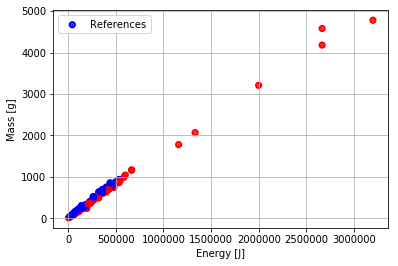

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

path='./data/'
df_bat = pd.read_csv(path+'Batteries_Data.csv', sep=';')

# df_bat=df_bat[df_bat['TYPE'] != 'KOKAM']
# df_bat=df_bat[df_bat['TYPE'] != 'TATTU']

df_bat['Dominated']=0

df_bat = df_bat.reset_index(drop=True)# clear row index after ignoring one family battery

for row in range(len(df_bat['Weight_g'])):
    if dominated(df_bat.loc[row,'Energy_J'], df_bat.loc[row,'Weight_g'],df_bat['Energy_J'].values,df_bat['Weight_g'].values)>0:
        df_bat.loc[row,'Dominated']=1    

df_bat[df_bat['Dominated']==0].to_csv(r'./data/Non-Dominated-Batteries.csv',sep=';')#We save the non-dominated series to process after.

color_wheel = {0: 'r', 
               1: 'b'}

colors = df_bat['Dominated'].map(lambda x: color_wheel.get(x))

plt.scatter(df['Energy_J'], df['Weight_g'], c=colors, s=5, linewidth=5,label='References')


plt.ylabel('Mass [g]')
plt.xlabel('Energy [J]')
plt.legend()
plt.grid()
plt.show()

These dominated points can be visualized in a scatter matrix to see their effects in other variables.

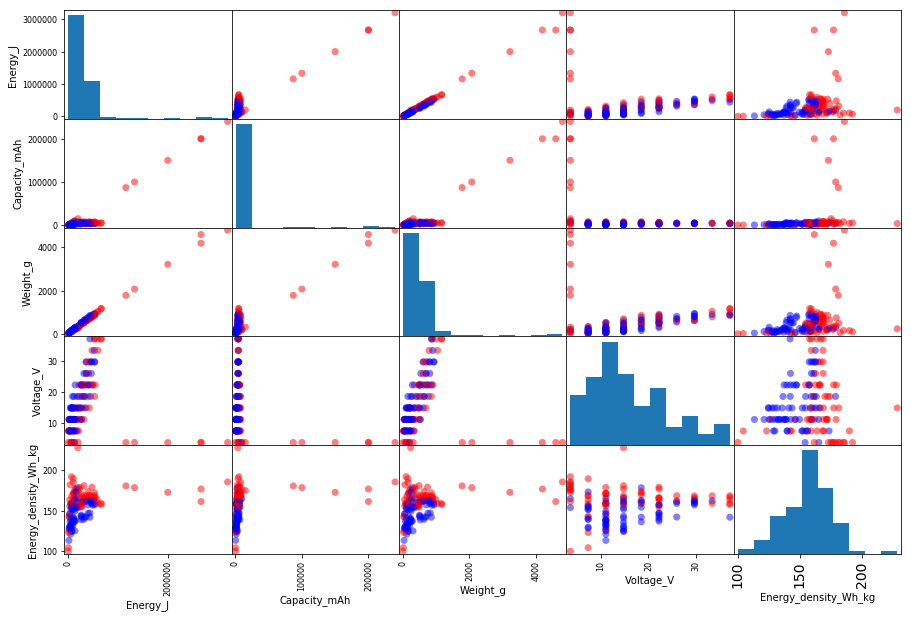

In [5]:
pd.plotting.scatter_matrix(df_bat[['Energy_J','Capacity_mAh','Weight_g','Voltage_V','Energy_density_Wh_kg']], color=colors, figsize=[15,10], s=200);
plt.tick_params(axis = 'both', labelsize = 14)
plt.rcParams.update({'font.size': 14})

In <span style="color:red">red</span> the dominating points for the criteria of **highest energy and lowest weight**. We will save these points into a separate worksheet. In <span style="color:blue">blue</span>, the rest of points.

### Filter data based on a selection model
In some cases, it is much more practical to select such values which better fit to the estimation model.
In this visualization, data are sorted depending on their value if greater or lower than the estimation model.

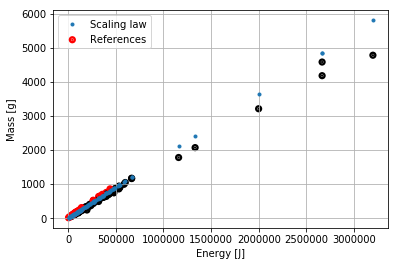

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Battery
# Ref : Prolitex TP3400-4SPX25
Mbat_ref=329 # [g] mass
Ebat_ref=4*3.7*3.4*3600 # [J] energy

#Scaling law

df['M_[g]*']=Mbat_ref*(df['Energy_J']/Ebat_ref) # [g] Battery mass

#separate values greater or lower than equation
for row in range(len(df['Energy_J'])):
    if (df.loc[row,'Weight_g']-df.loc[row,'M_[g]*'])<0:
        df.loc[row,'Lower values']=1
    else: df.loc[row,'Lower values']=0
        
color_wheel = {0: 'r', 
               1: 'k'} #we color in red the upper series

colors = df['Lower values'].map(lambda x: color_wheel.get(x))


plt.scatter(df['Energy_J'], df['Weight_g'], c=colors, s=5, linewidth=5,label='References')
plt.plot(df['Energy_J'],df['M_[g]*'], '.', label='Scaling law')

# df[df['Lower values']==1].to_csv(r'./data/Lower-Values-Batteries.csv',sep=';')#We save the lower values.
# df[df['Lower values']==0].to_csv(r'./data/Greater-Values-Batteries.csv',sep=';')#We save the greater values.

plt.ylabel('Mass [g]')
plt.xlabel('Energy [J]')
plt.legend()
plt.grid()
plt.show()

In <span style="color:red">red</span> we see the data over the scaling law. In **black**, the values under it.

### Get values closer to the estimation model
Two functions are created to select the closest values to the estimation model from below and from above the equation:

**dominated_below** selects those values below the estimation model, which are closest to the estimation model.

In [5]:
def dominated_below(x_,y_,X_,Y_,Y_SL):
    compteur=0
    for a,b,c in zip(X_,Y_,Y_SL):
        #for values greater than SL and high first var and small second var
        if (b-c) <0 and (a<x_) and (b>y_):
            compteur +=1
    return compteur

**dominated_above** selects those values above the estimation model, which are closest to the estimation model.

In [6]:
def dominated_above(x_,y_,X_,Y_,Y_SL):
    compteur=0
    for a,b,c in zip(X_,Y_,Y_SL):
        #for values greater than SL and high first var and small second var
        if (b-c) >0 and (a>x_) and (b<y_):
            compteur +=1
    return compteur

For each value, we plot in red those which are closest to the estimation model and in black the rest of points.

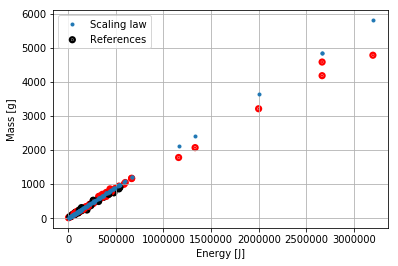

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Battery
# Ref : Prolitex TP3400-4SPX25
Mbat_ref=329 # [g] mass
Ebat_ref=4*3.7*3.4*3600 # [J] energy

#Scaling law

df['M_[g]*']=Mbat_ref*(df['Energy_J']/Ebat_ref) # [g] Battery mass

#Select closest values to the scaling law
for row in range(len(df['Energy_J'])):
    if dominated_below(df.loc[row,'Energy_J'], df.loc[row,'Weight_g'],df['Energy_J'].values,df['Weight_g'].values,df['M_[g]*'].values)>0:
        df.loc[row,'Dominant values']=0  
    elif dominated_above(df.loc[row,'Energy_J'], df.loc[row,'Weight_g'],df['Energy_J'].values,df['Weight_g'].values,df['M_[g]*'].values)>0:
        df.loc[row,'Dominant values']=0  
    else: df.loc[row,'Dominant values']=1

color_wheel = {0: 'k', 
               1: 'r'} #we color in red the non-dominated series

colors = df['Dominant values'].map(lambda x: color_wheel.get(x))

# df[df['Dominant closest values']==0].to_csv(r'./Data/Closest-Values-Batteries.csv',sep=';')#We save the closest values.

plt.scatter(df['Energy_J'], df['Weight_g'], c=colors, s=5, linewidth=5,label='References')
plt.plot( df['Energy_J'],df['M_[g]*'], '.', label='Scaling law')


plt.ylabel('Mass [g]')
plt.xlabel('Energy [J]')
plt.legend()
plt.grid()
plt.show()

In <span style="color:red">red</span> we see the closest values to the scaling law. In **black**, the external values.

### Get the closest lower/upper values to the estimation model
Now, we can be interested in selecting the closest upper /lower values from the selection model

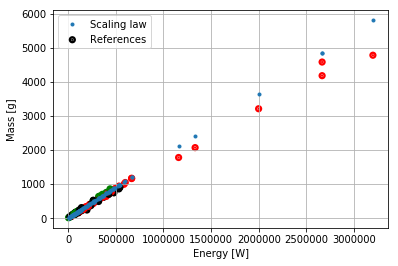

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Battery
# Ref : Prolitex TP3400-4SPX25
Mbat_ref=329 # [g] mass
Ebat_ref=4*3.7*3.4*3600 # [J] energy

#Scaling law

df['M_[g]*']=Mbat_ref*(df['Energy_J']/Ebat_ref) # [g] Battery mass

for row in range(len(df['Energy_J'])):
    if (df.loc[row,'Weight_g']-df.loc[row,'M_[g]*'])>0:
        if dominated_above(df.loc[row,'Energy_J'], df.loc[row,'Weight_g'],df['Energy_J'].values,df['Weight_g'].values,df['M_[g]*'].values)>0:
            df.loc[row,'Dominant values']=0        
        else: df.loc[row,'Dominant values']=+1         
    else:
        if dominated_below(df.loc[row,'Energy_J'], df.loc[row,'Weight_g'],df['Energy_J'].values,df['Weight_g'].values,df['M_[g]*'].values)>0:
            df.loc[row,'Dominant values']=0        
        else: df.loc[row,'Dominant values']=-1         
        
        
color_wheel = {-1: 'r',
               0: 'k',
               1: 'g'} #we color in red the dominant series from below and in green the dominant series from above

colors = df['Dominant values'].map(lambda x: color_wheel.get(x))

df[df['Dominant values']==-1].to_csv(r'./Data/Closest-Upper-Values-Batteries.csv',sep=';')#We save the closest values.
df[df['Dominant values']==1].to_csv(r'./Data/Closest-Lower-Values-Batteries.csv',sep=';')#We save the closest values.

plt.scatter(df['Energy_J'], df['Weight_g'], c=colors, s=5, linewidth=5,label='References')
plt.plot( df['Energy_J'],df['M_[g]*'], '.', label='Scaling law')


plt.ylabel('Mass [g]')
plt.xlabel('Energy [W]')
plt.legend()
plt.grid()
plt.show()

In <span style="color:green">green</span> we see the closest values over the scaling law. In <span style="color:red">red</span>, the closest one under it and in **black**, we have the external points.